In [3]:
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf

c:\Users\kairo\anaconda3\envs\cwq\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [61]:
low_density = ["4", "20", "148"]
high_density = ["123", "211", "224"]
types = ["A", "PR", "L", "M", "D", "P"]
dataY = []
data = []
sides = []
names = []
for filename in os.listdir(os.getcwd() + "\data"):
    measure = []
    names.append(filename)
    dense = 0
    side = "PR"
    for h in high_density:
        if h in filename:  
            dense = 1
        for i, t in enumerate(types):
            if t in filename:
                side = i
                break
    sides.append(side)
    dataY.append(dense)
    with open(os.path.join(os.getcwd() + "\data", filename), 'r') as f: # open in readonly mode
        
        rows = f.read().splitlines()
        for i,r in enumerate(rows):
            if(i < 1500):
                continue
            if(i == 5500):
                break
            col = r.split("\t")
            measure.append(col[1])
        data.append(measure)
print(sides)
sides = np.array(sides)
sides_onehot = np.zeros((sides.size, sides.max() + 1))
sides_onehot[np.arange(sides.size), sides] = 0.01
data = np.array(data)
data = np.hstack([data, sides_onehot])
print(sides.shape)
print(data.shape)
print(data)


[0, 4, 2, 3, 5, 1, 0, 4, 2, 3, 5, 1, 0, 4, 3, 5, 1, 0, 4, 2, 3, 5, 1, 0, 4, 2, 3, 5, 1, 0, 4, 2, 3, 5, 1]
(35,)
(35, 4006)
[['0.035' '0.036' '0.039' ... '0.0' '0.0' '0.0']
 ['-0.027' '-0.025' '-0.024' ... '0.0' '0.01' '0.0']
 ['-0.017' '-0.016' '-0.020' ... '0.0' '0.0' '0.0']
 ...
 ['0.003' '0.002' '0.002' ... '0.01' '0.0' '0.0']
 ['-0.033' '-0.030' '-0.028' ... '0.0' '0.0' '0.01']
 ['-0.006' '-0.007' '-0.007' ... '0.0' '0.0' '0.0']]


In [69]:
# for i, d in enumerate(data):
#     if "A" in names[i]:
#         print(len(d))
#         print(names[i])
#         print(i)
SIZE = len(data)
SPLIT = 5
x_train = np.array(data[:-SPLIT], dtype=float)
y_train = np.array(dataY[:-SPLIT], dtype=float)

x_test = np.array(data[-SPLIT:], dtype=float)
y_test = np.array(dataY[-SPLIT:], dtype=float)

shape = x_train.shape

for i, d in enumerate(x_train):
    x_train[i] = d - d.min()
    x_train[i] = x_train[i] / (d.max() - d.min())
print(x_train)



[[0.65829146 0.66331658 0.67839196 ... 0.48241206 0.48241206 0.48241206]
 [0.01538462 0.04615385 0.06153846 ... 0.43076923 0.58461538 0.43076923]
 [0.30882353 0.32352941 0.26470588 ... 0.55882353 0.55882353 0.55882353]
 ...
 [0.83333333 0.81481481 0.81481481 ... 0.5        0.5        0.68518519]
 [0.37974684 0.36708861 0.36708861 ... 0.44303797 0.44303797 0.44303797]
 [0.48639456 0.48979592 0.49319728 ... 0.5        0.5        0.5       ]]


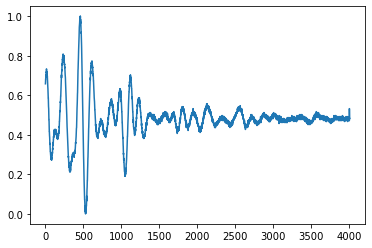

1.0


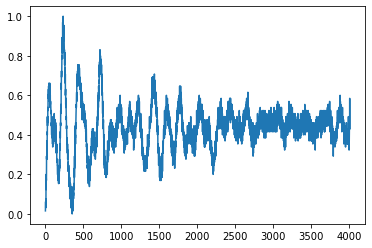

1.0


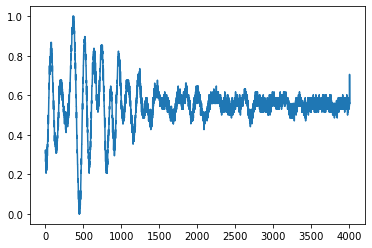

1.0


In [70]:
for i in range(3):
    plt.plot(x_train[i])
    plt.show()
    print(y_train[i])

# plt.plot( data[6].T[0], data[6].T[1])
# plt.show()
# print(dataY[6])
# plt.plot( data[12].T[0], data[12].T[1])
# plt.show()
# print(dataY[12])
# plt.plot( data[17].T[0], data[17].T[1])
# plt.show()
# print(dataY[17])
# plt.plot( data[23].T[0], data[23].T[1])
# plt.show()
# print(dataY[23])
# plt.plot( data[29].T[0], data[29].T[1])
# plt.show()
# print(dataY[29])

In [71]:

print(f"Training labels has shape: {y_train.shape} and dtype: {y_train.dtype}")
print(f"Training images has shape: {x_train.shape} and dtype: {x_train.dtype}")

Training labels has shape: (30,) and dtype: float64
Training images has shape: (30, 4006) and dtype: float64


In [72]:
def create_dataset(data, dataY, batch_size):

    # Generate a TF Dataset from the series values
    dataY = np.reshape(dataY, (-1, 1))
    dataset = tf.data.Dataset.from_tensor_slices((data, dataY))
    dataset = tf.data.Dataset.shuffle(dataset, buffer_size=30)
    # for x, y in dataset:
    #     print(x.numpy(), y.numpy())
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset
create_dataset(x_train, y_train, 4)


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 4006), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

In [73]:
def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  return model

In [74]:
dataset = create_dataset(x_train, y_train, 5)
val_dataset = create_dataset(x_test, y_test, 1)
#print(dataset.shape)

model = create_model()

model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])


In [75]:
history = model.fit(dataset, epochs = 150, verbose=2, validation_data=val_dataset)

Epoch 1/150
6/6 - 1s - loss: 0.8279 - accuracy: 0.5000 - val_loss: 0.6904 - val_accuracy: 0.8000 - 669ms/epoch - 112ms/step
Epoch 2/150
6/6 - 0s - loss: 0.6727 - accuracy: 0.6000 - val_loss: 0.6903 - val_accuracy: 0.8000 - 40ms/epoch - 7ms/step
Epoch 3/150
6/6 - 0s - loss: 0.6719 - accuracy: 0.6000 - val_loss: 0.6900 - val_accuracy: 1.0000 - 39ms/epoch - 6ms/step
Epoch 4/150
6/6 - 0s - loss: 0.6746 - accuracy: 0.6000 - val_loss: 0.6902 - val_accuracy: 1.0000 - 38ms/epoch - 6ms/step
Epoch 5/150
6/6 - 0s - loss: 0.6716 - accuracy: 0.6000 - val_loss: 0.6901 - val_accuracy: 1.0000 - 38ms/epoch - 6ms/step
Epoch 6/150
6/6 - 0s - loss: 0.6708 - accuracy: 0.6000 - val_loss: 0.6898 - val_accuracy: 1.0000 - 37ms/epoch - 6ms/step
Epoch 7/150
6/6 - 0s - loss: 0.6703 - accuracy: 0.6000 - val_loss: 0.6894 - val_accuracy: 1.0000 - 39ms/epoch - 7ms/step
Epoch 8/150
6/6 - 0s - loss: 0.6686 - accuracy: 0.6000 - val_loss: 0.6892 - val_accuracy: 1.0000 - 37ms/epoch - 6ms/step
Epoch 9/150
6/6 - 0s - loss: 

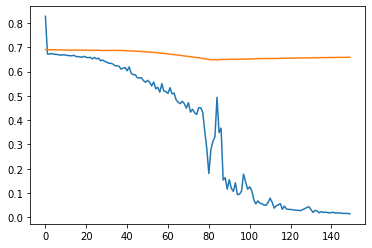

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [77]:
metrics = model.evaluate(x_train, y_train)
print(metrics)
predict_model = model.predict(x_test)
# predict_model = tf.keras.Sequential([model, 
#                                      tf.keras.layers.Softmax()])
# predictions = predict_model.predict(x_train)
model.summary()

1/1 [==============================] - 0s 107ms/step - loss: 0.0149 - accuracy: 1.0000
[0.0148947574198246, 1.0]
1/1 [==============================] - 0s 54ms/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                256448    
                                                                 
 dense_20 (Dense)            (None, 16)                1040      
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 257505 (1005.88 KB)
Trainable params: 257505 (1005.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
print(predict_model.shape)

(5, 1)


In [79]:
print(np.round(predict_model).T[0])
print(y_test)

[0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0.]


In [ ]:
checkpoint_dir = "/models/training.ckpt"
model.save_weights(checkpoint_path.format(epoch=0))
os.listdir(checkpoint_dir)